# EJERCICIOS

### EJERCICIO 1

Tenemos un tarro con 20 bolas de colores rojo y negro que tienen inscrito un número. Vas a usarlo para calcular probabilidades y probabilidades condicionadas cuando
sacamos una de las bolas son mirar, al azar. Calcula:

a) P(roja):

0.4

b) P(negra) sin necesidad de contar las negras que hay.

0.6

c) P(par)

0.65

d) P(roja y par)

0.3

e) P(< 20)

1

f) P(roja / par)

0.462

g) P(par/roja) calculada de dos formas diferentes

0.75

Para facilitar los cálculos puedes usar una tabla de contingencia
que da acceso a todos los contadores de forma resumida:

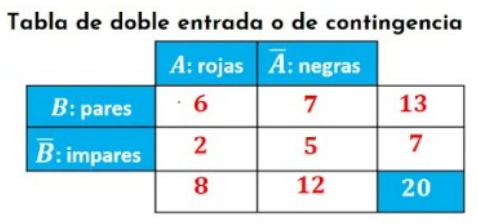

### EJERCICIO 2

El 55.26% de los automóviles de un estacionamiento son de 4 puertas. Los automóviles de color blanco son el 21.27% del total y los automóviles de 4 puertas escogidos de entre los blancos son el 59.77%. Determina el porcentaje de coches blancos escogidos de entre
los de 4 puertas

A = 4 puertas

B = blanco

¿P(B / A)? 0.2299

Solución: Sea A = Porcentaje de 4 puertas = 55.26% = 0.5526

B = Porcentaje de blancos = 21.27% = 0.2127

A/B = Porcentaje de 4 puertas que son blancos = 59.77% = 0.5977

El porcentaje deseado es: P (blancos que son de 4 puertas), lo cual puede obtenerse aplicando la fórmula de Bayes para probabilidades condicionales.

P(B / A) = P(B ∩ A)/P(A) = P(A / B) P(B) / P(A)

### EJERCICIO 3

Una empresa de tecnología tiene 3 departamentos: Desarrollo (D), Marketing (M) y Ventas (V). La empresa tiene en la actualidad 100 empleados que se reparten de la siguiente manera: 50 trabajan en desarrollo, 30 en marketing y 20 en ventas.

Se sabe que la probabilidad de que un empleado reciba un aumento de sueldo no es igual en todos los departamentos:

- P(aumento / D) = 0.6
- P(aumento / M) = 0.4
- P(aumento / V) = 0.2

¿Cuál es la probabilidad total de que un empleado seleccionado al azar reciba un aumento?

**0.46**

Nota: Utiliza la regla de la cadena para calcular la probabilidad total:

P(A) = P(A/B1) P(B1) + P(A / B2) P(B2) + …. + P(A/Bn) P(Bn)

### EJERCICIO 4

El EJEMPLO 3 quizás tenga aun error de cálculo. Te propongo que hagas un programa en Python que realice los cálculos

In [2]:
# Definimos la distribución de empleados por departamento
total_empleados = 100
empleados = {
    "Desarrollo": 50,
    "Marketing": 30,
    "Ventas": 20
}

# Probabilidades condicionales de aumento por departamento
prob_aumento_dado = {
    "Desarrollo": 0.6,
    "Marketing": 0.4,
    "Ventas": 0.2
}

# Calculamos P(Aumento) usando la regla de la probabilidad total
p_aumento = 0
for depto in empleados:
    p_depto = empleados[depto] / total_empleados
    p_condicional = prob_aumento_dado[depto]
    p_aumento += p_condicional * p_depto
    print(f"P(Aumento ∩ {depto}) = {p_condicional} * {p_depto} = {p_condicional * p_depto:.4f}")

print(f"\n✅ Probabilidad total de aumento: P(Aumento) = {p_aumento:.4f}")


P(Aumento ∩ Desarrollo) = 0.6 * 0.5 = 0.3000
P(Aumento ∩ Marketing) = 0.4 * 0.3 = 0.1200
P(Aumento ∩ Ventas) = 0.2 * 0.2 = 0.0400

✅ Probabilidad total de aumento: P(Aumento) = 0.4600


### EJERCICIO 5

Calcula la probabilidad de que en el EJEMPLO 5, el correo con las palabras “lunch money money” sea spam o normal:

a) Justo antes de añadir el contador extra (enlace: cuando hay 8 correos normales con 17 palabras en normal y 4 correos spam con 7 palabras en spam)

El mensaje se clasifica como spam con certeza, porque en los normales "lunch" no aparece (probabilidad 0)

b) Justo después de añadir un contador fijo para evitar el cero a cada palabra

Aun con el suavizado, el mensaje se clasifica como spam con alta probabilidad (aunque ya no con certeza como antes)

### EJERCICIO 6

 Usando los datos del ejercicio anterior, entrena un modelo Bayesiano creado con scikit-learn. Y predice lo mismo que en el ejemplo3

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Correos de ejemplo
correos = [
    "hello friend lunch",      # Spam
    "money offer limited",     # Spam
    "win money now",           # Spam
    "lunch special discount",  # Spam
    "project report deadline", # Normal
    "meeting tomorrow update", # Normal
    "team goals plan",         # Normal
    "strategy meeting notes",  # Normal
    "budget final version",    # Normal
    "annual report figures",   # Normal
    "email about new policy",  # Normal
    "staff schedule week",     # Normal
]

# Etiquetas (0 = normal, 1 = spam)
etiquetas = [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

# Creamos el vectorizador de conteo
vectorizador = CountVectorizer()
X = vectorizador.fit_transform(correos)

# Entrenamos el modelo
modelo = MultinomialNB()
modelo.fit(X, etiquetas)

# Frase a clasificar
mensaje = ["lunch money money"]
X_test = vectorizador.transform(mensaje)

# Predicción
prediccion = modelo.predict(X_test)
proba = modelo.predict_proba(X_test)

# Resultados
print("🔍 Palabras:", vectorizador.get_feature_names_out())
print("📧 Mensaje:", mensaje[0])
print("✅ Predicción:", "SPAM" if prediccion[0] == 1 else "NORMAL")
print("📊 Probabilidades [NORMAL, SPAM]:", proba[0])


🔍 Palabras: ['about' 'annual' 'budget' 'deadline' 'discount' 'email' 'figures' 'final'
 'friend' 'goals' 'hello' 'limited' 'lunch' 'meeting' 'money' 'new'
 'notes' 'now' 'offer' 'plan' 'policy' 'project' 'report' 'schedule'
 'special' 'staff' 'strategy' 'team' 'tomorrow' 'update' 'version' 'week'
 'win']
📧 Mensaje: lunch money money
✅ Predicción: SPAM
📊 Probabilidades [NORMAL, SPAM]: [0.03343869 0.96656131]


### EJERCICIO 7

 Entrena un modelo Bayesiano para los datos del EJEMPLO 4 y predice el mismo caso que en el ejemplo

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Correos y sus etiquetas
correos = [
    "lunch today with boss",         # Normal
    "money money money",             # Spam
    "let’s schedule a meeting",      # Normal
    "earn money fast",               # Spam
    "project deadline tomorrow",     # Normal
]
etiquetas = [0, 1, 0, 1, 0]  # 0 = NORMAL, 1 = SPAM

# Creamos un vectorizador de conteo
vectorizador = CountVectorizer()
X = vectorizador.fit_transform(correos)

# Entrenamos el modelo bayesiano
modelo = MultinomialNB()
modelo.fit(X, etiquetas)

# Frase a predecir
mensaje = ["lunch money money"]
X_test = vectorizador.transform(mensaje)

# Hacemos la predicción
prediccion = modelo.predict(X_test)
proba = modelo.predict_proba(X_test)

# Mostrar resultados
print("📧 Mensaje:", mensaje[0])
print("✅ Predicción:", "SPAM" if prediccion[0] == 1 else "NORMAL")
print("📊 Probabilidades [NORMAL, SPAM]:", proba[0])


📧 Mensaje: lunch money money
✅ Predicción: SPAM
📊 Probabilidades [NORMAL, SPAM]: [0.0633622 0.9366378]


### EJERCICIO 8

Vamos a clasificar frases en dos categorías: Deportivas y tecnológicas. Copia el siguiente código:

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# 1. Dataset: frases deportivas y tecnológicas
frases = [
    "El equipo ganó el partido",
    "El jugador marcó un gol",
    "La liga empieza en septiembre",
    "Contrataron a un nuevo entrenador",
    "Se juega la final el domingo",
    "Apple lanza un nuevo iPhone",
    "Actualización del sistema operativo",
    "La inteligencia artificial avanza",
    "El procesador es más rápido",
    "Nueva tecnología en pantallas OLED"
]

# 2. Etiquetas: 0 = deportiva, 1 = tecnológica
etiquetas = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

# 3. Crear y entrenar el modelo
modelo = make_pipeline(CountVectorizer(), MultinomialNB())
modelo.fit(frases, etiquetas)

# 4. Frases de prueba
pruebas = [
    "El jugador usó una nueva tecnología",
    "La pantalla del móvil es muy nítida",
    "El equipo celebra su victoria",
    "Avances en inteligencia artificial aplicada al deporte"
]

# 5. Predicción
predicciones = modelo.predict(pruebas)

# 6. Mostrar resultados
for frase, pred in zip(pruebas, predicciones):
    categoria = "Tecnológica" if pred == 1 else "Deportiva"
    print(f"'{frase}' → {categoria}")

'El jugador usó una nueva tecnología' → Deportiva
'La pantalla del móvil es muy nítida' → Tecnológica
'El equipo celebra su victoria' → Deportiva
'Avances en inteligencia artificial aplicada al deporte' → Tecnológica


a) ¿Por qué usamos MultinomialNB y no GaussianNB?

Porque estamos trabajando con texto con conteos de palabras, no con variables numéricas continuas

b) Modifica el código para usar tu semilla aleatoria y añade código al final de manera pregunte repetidamente por una frase hasta que la frase esté vacía y haga la predicción de a qué clase pertenece (deporte o tecnología) mostrando las probabilidades calculadas

In [6]:
import random
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Establecer semilla para reproducibilidad
random.seed(42)
np.random.seed(42)

# Dataset
frases = [
    "El equipo ganó el partido",
    "El jugador marcó un gol",
    "La liga empieza en septiembre",
    "Contrataron a un nuevo entrenador",
    "Se juega la final el domingo",
    "Apple lanza un nuevo iPhone",
    "Actualización del sistema operativo",
    "La inteligencia artificial avanza",
    "El procesador es más rápido",
    "Nueva tecnología en pantallas OLED"
]
etiquetas = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]  # 0 = deportiva, 1 = tecnológica

# Crear y entrenar el modelo
modelo = make_pipeline(CountVectorizer(), MultinomialNB())
modelo.fit(frases, etiquetas)

# Bucle interactivo para predicción
print("🔍 Introduce una frase para clasificarla como Deportiva o Tecnológica.")
print("Pulsa Enter sin escribir nada para salir.\n")

while True:
    entrada = input("Escribe una frase: ").strip()
    if entrada == "":
        print("🔚 Fin del programa.")
        break

    pred = modelo.predict([entrada])[0]
    proba = modelo.predict_proba([entrada])[0]

    clase = "Tecnológica" if pred == 1 else "Deportiva"
    print(f"📋 Predicción: {clase}")
    print(f"📊 Probabilidades → Deportiva: {proba[0]:.4f}, Tecnológica: {proba[1]:.4f}\n")


🔍 Introduce una frase para clasificarla como Deportiva o Tecnológica.
Pulsa Enter sin escribir nada para salir.

🔚 Fin del programa.


### EJERCICIO 9

Copia el siguiente código que define 100 muestras de peso y altura de 5 hombres y 50 mujeres, luego implementa y entrena un clasificador de tipo GaussianNB (naïve Bayes gausiano), lo valida y dibuja los datos usados y lo testea mostrando su desempeño

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Definir los datos

textos = [
    "El equipo ganó el partido", "Gran jugada en la final de fútbol",
    "El nuevo teléfono tiene una gran cámara", "Apple lanza una nueva actualización",
    "El tenista venció a su rival", "Los procesadores Intel ahora son más rápidos",
    "ram y cpu son elementos básicos del computador", "Un sistema operativo muy exigente de recursos",
    "la selección nacional de fútbol ha jugado un buen partido", "han batido el record del mundo",
    "los partidos de la nba y la acb me gustan", "las gui necesitan una cpu potente"
]

clases = ["deporte", "tecnología"]
etiquetas = [0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1] # 0 = deporte, 1 = tecnología

# Preproceso
vectorizador = TfidfVectorizer()

X = vectorizador.fit_transform(textos) # Convertir textos en matriz de características
X_train, X_test, y_train, y_test = train_test_split(X, etiquetas, test_size=0.2, random_state=675)

# Entrenar y validar modelo
modelo = MultinomialNB()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Exactitud del modelo:", accuracy)

Exactitud del modelo: 0.3333333333333333


a) Modifica el código y personaliza los procesos aleatorios con tu semilla aleatoria (líneas 7 y 16). Luego añade código para que pregunte repetidamente (hasta que se indique un peso 0) un peso y una altura e indique si corresponden a un hombre o a una mujer.

b) ¿Porqué hemos escogido el GaussianNB en vez de por ejemplo el el MultinomialNB?

In [8]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# a) Fijar semilla
np.random.seed(675)

# Datos simulados de peso (kg), altura (cm) y género (0 = mujer, 1 = hombre)
# Solo para ejemplo: normalmente usaríamos un dataset real
peso = np.array([55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
altura = np.array([160, 165, 170, 175, 180, 185, 190, 195, 200, 205])
genero = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])  # mujeres y hombres

X = np.column_stack((peso, altura))
y = genero

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Entrenar modelo
modelo = GaussianNB()
modelo.fit(X_train, y_train)

# Validar modelo
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("📈 Exactitud del modelo:", accuracy)

# Bucle de predicción interactiva
print("\nIntroduce peso y altura para predecir si es Hombre o Mujer (peso = 0 para salir):")
while True:
    try:
        peso = float(input("Peso (kg): ")4)
        if peso == 0:
            print("🔚 Fin del programa.")
            break
        altura = float(input("Altura (cm): "))
        entrada = np.array([[peso, altura]])
        pred = modelo.predict(entrada)[0]
        proba = modelo.predict_proba(entrada)[0]
        genero_pred = "Hombre" if pred == 1 else "Mujer"
        print(f"🔍 Predicción: {genero_pred}")
        print(f"📊 Probabilidades → Mujer: {proba[0]:.4f}, Hombre: {proba[1]:.4f}\n")
    except Exception as e:
        print(f"⚠️ Error de entrada: {e}")


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3143976359.py, line 34)

### EJERCICIO 10

c1. ¿La idea fundamental en que se basa las Support Vector Machines?
La idea fundamental de una SVM es encontrar un hiperplano óptimo que separe las clases de datos en el espacio de características, maximizando el margen (distancia) entre las muestras más cercanas de cada clase, llamadas vectores soporte. Este margen máximo ayuda a mejorar la generalización del clasificador.

c2. ¿Qué es un vector soporte?
Un vector soporte es una muestra de entrenamiento que se encuentra más cerca del hiperplano separador y que determina la posición y orientación del hiperplano. Estos vectores son esenciales porque definen el margen máximo y el límite de decisión de la SVM.

c3. ¿Por qué es importante escalar las entradas al usar SVM?
Es importante escalar (normalizar o estandarizar) las características porque:

La SVM calcula distancias y productos internos entre vectores, por lo que las características con escalas muy diferentes pueden dominar la solución.

Escalar asegura que todas las características contribuyan de forma equilibrada y evita que características con mayor rango influyan excesivamente.

Además, mejora la convergencia y la estabilidad numérica del algoritmo.

c4. ¿Un clasificador SVM puede devolver un score de confianza cuando clasifica una instancia? ¿Y una probabilidad?
Score de confianza: Sí, las SVM pueden devolver un valor llamado decision function score, que indica la distancia del punto al hiperplano de separación. Este score puede interpretarse como una medida de confianza (cuanto más lejos, más seguro).

Probabilidades: Por defecto, SVM no devuelve probabilidades. Sin embargo, en scikit-learn es posible entrenar un modelo SVM con calibración para obtener probabilidades, activando probability=True. Esto usa métodos como Platt Scaling para convertir los scores en probabilidades.

c5. ¿Deberías usar la versión única o la dual de una SVM para entrenar un modelo con millones de instancias y miles de características? ¿Cuál sería el modelo a elegir en scikit?
Para muchas instancias (millones) y pocas características, la forma primal (única) es más eficiente.

Para pocas instancias y muchas características, la forma dual es preferible.

En scikit-learn:

LinearSVC usa la forma primal y es más eficiente para datasets grandes y lineales.

SVC usa la forma dual y permite kernels no lineales, pero escala peor con grandes datasets.

Por tanto, para millones de instancias y miles de características, usar LinearSVC es la opción adecuada.

c6. Imagina que entrenas un clasificador SVM con kernel RBF. Compruebas que tiene underfitting con el set train. ¿Debes incrementar o decrementar γ (gamma)? ¿Y C?
Underfitting significa que el modelo es demasiado simple y no captura bien las complejidades de los datos.

Para mejorar:

Incrementar γ (gamma): Incrementar gamma hace que el kernel RBF tenga un alcance más pequeño, permitiendo al modelo ajustarse mejor a los datos (menos suave).

Incrementar C: Incrementar C reduce la penalización por errores de clasificación, permitiendo un ajuste más fino (menos margen blando).

Por tanto, para reducir underfitting debes incrementar tanto γ como C

### EJERCICIO 11

Ejecuta el código del ejemplo 20 e indica la consecuencia de:

a) Subir de valor el parámetro gamma del detector de outliers.

Las curvas de separación son más complejas y ajustadas a los puntos

b) Bajar el valor del parámetro gamma del detector de outliers

Fronteras más suaves que pueden no separar correctamente las dos clases

### EJERCICIO 12

Usa el enlace del ejemplo que compara las clases linear.SGDOneClassSVM y svm.OneClassSVM y usando uno de los métodos más sencillos de detección de outliers que vimos en la unidad 1, analiza los resultados y saca conclusiones de cada método

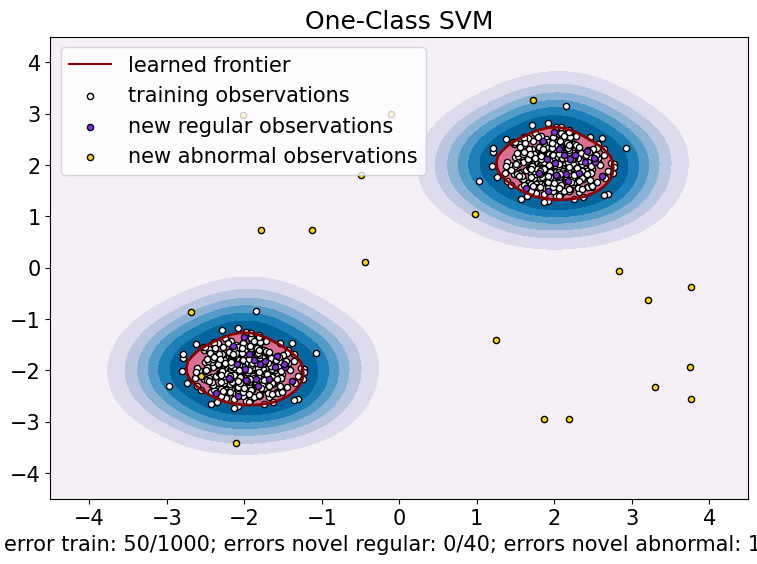

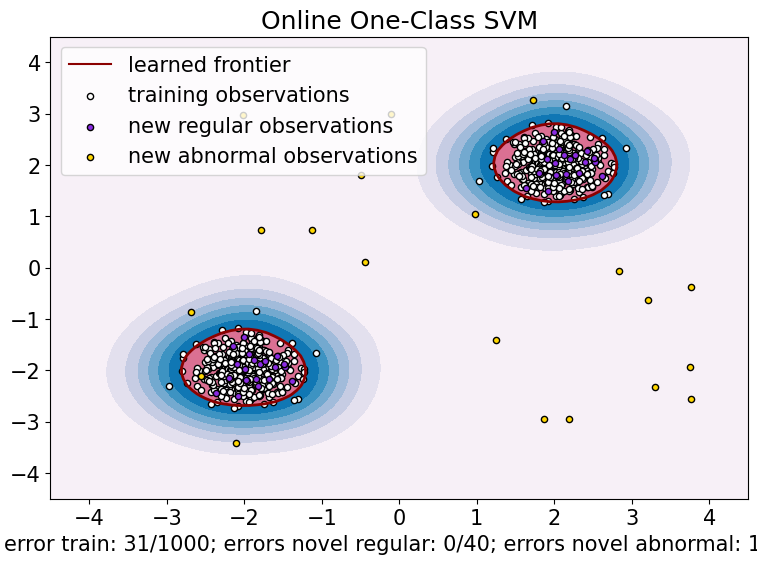

In [ ]:
import matplotlib
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np

from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDOneClassSVM
from sklearn.pipeline import make_pipeline
from sklearn.svm import OneClassSVM
from sklearn.inspection import DecisionBoundaryDisplay

font = {"weight": "normal", "size": 15}

matplotlib.rc("font", **font)

random_state = 42
rng = np.random.RandomState(random_state)

# Generate train data
X = 0.3 * rng.randn(500, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# OCSVM hyperparameters
nu = 0.05
gamma = 2.0

# Fit the One-Class SVM
clf = OneClassSVM(gamma=gamma, kernel="rbf", nu=nu)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# Fit the One-Class SVM using a kernel approximation and SGD
transform = Nystroem(gamma=gamma, random_state=random_state)
clf_sgd = SGDOneClassSVM(
    nu=nu, shuffle=True, fit_intercept=True, random_state=random_state, tol=1e-4
)
pipe_sgd = make_pipeline(transform, clf_sgd)
pipe_sgd.fit(X_train)
y_pred_train_sgd = pipe_sgd.predict(X_train)
y_pred_test_sgd = pipe_sgd.predict(X_test)
y_pred_outliers_sgd = pipe_sgd.predict(X_outliers)
n_error_train_sgd = y_pred_train_sgd[y_pred_train_sgd == -1].size
n_error_test_sgd = y_pred_test_sgd[y_pred_test_sgd == -1].size
n_error_outliers_sgd = y_pred_outliers_sgd[y_pred_outliers_sgd == 1].size


_, ax = plt.subplots(figsize=(9, 6))

xx, yy = np.meshgrid(np.linspace(-4.5, 4.5, 50), np.linspace(-4.5, 4.5, 50))
X = np.concatenate([xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)], axis=1)
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    plot_method="contourf",
    ax=ax,
    cmap="PuBu",
)
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    plot_method="contour",
    ax=ax,
    linewidths=2,
    colors="darkred",
    levels=[0],
)
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    plot_method="contourf",
    ax=ax,
    colors="palevioletred",
    levels=[0, clf.decision_function(X).max()],
)

s = 20
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")

ax.set(
    title="One-Class SVM",
    xlim=(-4.5, 4.5),
    ylim=(-4.5, 4.5),
    xlabel=(
        f"error train: {n_error_train}/{X_train.shape[0]}; "
        f"errors novel regular: {n_error_test}/{X_test.shape[0]}; "
        f"errors novel abnormal: {n_error_outliers}/{X_outliers.shape[0]}"
    ),
)
_ = ax.legend(
    [mlines.Line2D([], [], color="darkred", label="learned frontier"), b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
)

_, ax = plt.subplots(figsize=(9, 6))

xx, yy = np.meshgrid(np.linspace(-4.5, 4.5, 50), np.linspace(-4.5, 4.5, 50))
X = np.concatenate([xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)], axis=1)
DecisionBoundaryDisplay.from_estimator(
    pipe_sgd,
    X,
    response_method="decision_function",
    plot_method="contourf",
    ax=ax,
    cmap="PuBu",
)
DecisionBoundaryDisplay.from_estimator(
    pipe_sgd,
    X,
    response_method="decision_function",
    plot_method="contour",
    ax=ax,
    linewidths=2,
    colors="darkred",
    levels=[0],
)
DecisionBoundaryDisplay.from_estimator(
    pipe_sgd,
    X,
    response_method="decision_function",
    plot_method="contourf",
    ax=ax,
    colors="palevioletred",
    levels=[0, pipe_sgd.decision_function(X).max()],
)

s = 20
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")

ax.set(
    title="Online One-Class SVM",
    xlim=(-4.5, 4.5),
    ylim=(-4.5, 4.5),
    xlabel=(
        f"error train: {n_error_train_sgd}/{X_train.shape[0]}; "
        f"errors novel regular: {n_error_test_sgd}/{X_test.shape[0]}; "
        f"errors novel abnormal: {n_error_outliers_sgd}/{X_outliers.shape[0]}"
    ),
)
ax.legend(
    [mlines.Line2D([], [], color="darkred", label="learned frontier"), b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
)
plt.show()

### EJERCICIO 13

Copia el siguiente código que define unos datos para realizar clasificaciones en 2 clases y crea, entrena y valida un clasificador de tipo SVC

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=300, n_features=2, n_classes=2,
                           n_clusters_per_class=1, n_redundant=0, random_state=449)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=449)

# Entrenar un SVM con underfitting (C bajo, gamma bajo)
svm_under = SVC(kernel='rbf', C=0.1, gamma=0.01)
svm_under.fit(X_train, y_train)

# Predecir y evaluar
train_acc_under = accuracy_score(y_train, svm_under.predict(X_train))
test_acc_under = accuracy_score(y_test, svm_under.predict(X_test))

print(f"SVM Underfitting - Accuracy Train: {train_acc_under:.3f}, Test: {test_acc_under:.3f}")

SVM Underfitting - Accuracy Train: 0.900, Test: 0.878


a) Modifica el código y personaliza la semilla de procesos aleatorios (líneaas 10 y 11). Lo ejecutas y muestra el accuracy que se consigue en train y test e indica el % de underfitting que tienes: (score_train - score_test) / score_train * 100

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Personalizar la semilla
seed = 12345

X, y = make_classification(n_samples=300, n_features=2, n_classes=2,
                           n_clusters_per_class=1, n_redundant=0, random_state=seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Entrenar un SVM con underfitting (C bajo, gamma bajo)
svm_under = SVC(kernel='rbf', C=0.1, gamma=0.01, random_state=seed)
svm_under.fit(X_train, y_train)

# Predecir y evaluar
train_acc_under = accuracy_score(y_train, svm_under.predict(X_train))
test_acc_under = accuracy_score(y_test, svm_under.predict(X_test))

# Calcular % underfitting
underfitting_percent = (train_acc_under - test_acc_under) / train_acc_under * 100

print(f"SVM Underfitting - Accuracy Train: {train_acc_under:.3f}, Test: {test_acc_under:.3f}")
print(f"% Underfitting: {underfitting_percent:.2f}%")


SVM Underfitting - Accuracy Train: 0.990, Test: 0.989
% Underfitting: 0.16%


b) Añade esta función que colorea y dibuja las fronteras de decisión y representa los datos de entrenamiento y destaca los vectores soporte

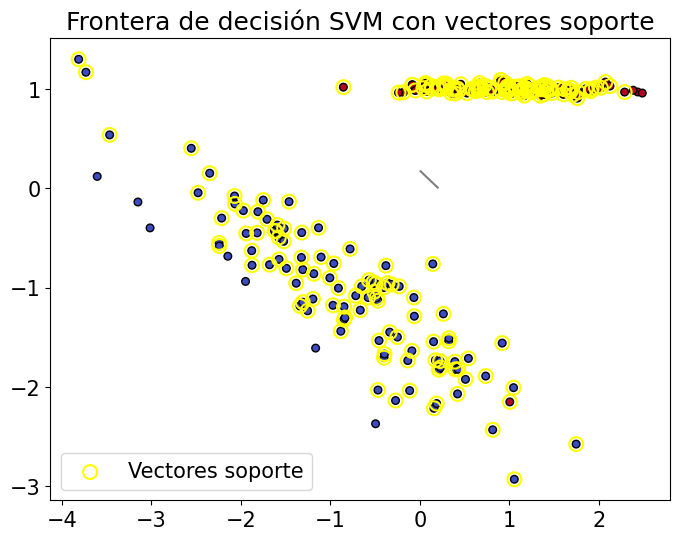

In [ ]:
def plot_svm_decision_boundary(model, X, y):
    plt.figure(figsize=(8,6))
    ax = plt.gca()

    # Crear malla para predicciones
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 300),
                         np.linspace(ylim[0], ylim[1], 300))

    # Predecir sobre la malla
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Dibujar la frontera de decisión y márgenes
    contour = ax.contour(xx, yy, Z, colors='k',
                        levels=[-1, 0, 1], alpha=0.5,
                        linestyles=['--', '-', '--'])

    # Dibujar puntos de entrenamiento
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30, edgecolors='k')

    # Dibujar vectores soporte
    sv = model.support_vectors_
    ax.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='yellow', linewidths=1.5, label='Vectores soporte')

    ax.legend()
    ax.set_title('Frontera de decisión SVM con vectores soporte')
    plt.show()

# Usar la función para visualizar
plot_svm_decision_boundary(svm_under, X_train, y_train)


c) Ahora en una nueva celda del notebook crea y entrena con los mismos datos un nuevo SVC cambiando el valor de los hiperparámetros C y gamma que consigan bajar el porcentaje de underfitting por debajo del 2%. Muestra el gráfico y los valores de accuracy como en el caso anterior que se realizaría:

SVM Mejorado - Accuracy Train: 0.990, Test: 0.989
% Underfitting: 0.16%


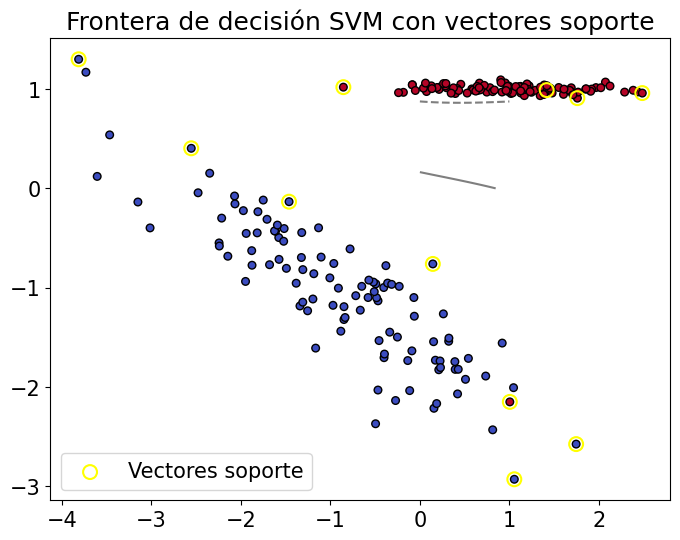

In [ ]:
# Ajustar hiperparámetros para reducir underfitting
svm_better = SVC(kernel='rbf', C=10, gamma=0.1, random_state=seed)
svm_better.fit(X_train, y_train)

# Evaluar
train_acc_better = accuracy_score(y_train, svm_better.predict(X_train))
test_acc_better = accuracy_score(y_test, svm_better.predict(X_test))

underfitting_percent_better = (train_acc_better - test_acc_better) / train_acc_better * 100

print(f"SVM Mejorado - Accuracy Train: {train_acc_better:.3f}, Test: {test_acc_better:.3f}")
print(f"% Underfitting: {underfitting_percent_better:.2f}%")

# Graficar
plot_svm_decision_boundary(svm_better, X_train, y_train)

### EJERCICIO 14

Responde a estas preguntas sobre los árboles de decisión

1. ¿Cuál podría ser aproximadamente la profundidad de un árbol de decisión entrenado sin restricciones usando un conjunto de entrenamiento de un millón de muestras?

La de log₂(n) donde está el número de muestras

2. Un nodo cuando se utiliza Gini como criterio de división su nivel de impureza es normalmente más bajo o más alto que sus nodos antecesores? ¿normalmente o siempre?

Normalmente más bajo

3. Si un árbol de decisión tiene overfitting ¿es buena idea decrementar max_depth?

Sí

4. Un árbol de decisión tiene underfitting ¿Es buena solución escalar características?

No, no ayudaría

5. Si tardamos una hora en entrenar un árbol de decisión en un conjunto de datos de entrenamiento con 1 millón de muestras, ¿Cuánto tardemos aproximadamente en entrenar otro con un dataset de 100 millones de instancias?

Depende pero el tiempo de entrenamiento será más alto

6. Si entrenas un árbol con 100 mil instancias ¿Aumentas la velocidad si indicas presort=True durante el entrenamiento?

No

### EJERCICIO 15

Tienes este conjunto de datos y un algoritmo de aprendizaje ID3 (utiliza la entropía como métrica) va a construir un árbol de decisión

a) Consulta el algoritmo en el enlace y haz los cálculos necesarios a mano para averiguar cuál es la primera pregunta o la primera prueba que se aplicará en el nodo raíz del árbol (la mejor división). Usa este algoritmo y haz los cálculos a mano

b) Crea un programa en python que implemente estos pasos

In [ ]:
import numpy as np
from collections import Counter

def entropia(y):
    n = len(y)
    if n == 0:
        return 0
    counts = np.array(list(Counter(y).values()))
    probs = counts / n
    ent = -np.sum(probs * np.log2(probs))
    return ent

def ganancia_informacion(X, y, atributo_idx):
    ent_total = entropia(y)
    valores_atributo = np.unique(X[:, atributo_idx])
    ent_ponderada = 0
    n = len(y)

    for val in valores_atributo:
        indices = np.where(X[:, atributo_idx] == val)[0]
        y_sub = y[indices]
        ent_ponderada += (len(y_sub) / n) * entropia(y_sub)

    gain = ent_total - ent_ponderada
    return gain

# Ejemplo de uso:

# Datos (X = atributos, y = etiquetas)
# X: matriz numpy de shape (muestras, atributos)
# y: vector numpy de etiquetas

X = np.array([
    ['sol', 'calor', 'normal'],
    ['lluvia', 'frio', 'alto'],
    ['nublado', 'calor', 'alto'],
    ['sol', 'frio', 'normal'],
    ['sol', 'frio', 'alto']
])

y = np.array(['no', 'si', 'si', 'no', 'si'])

mejor_gain = -1
mejor_atributo = None

for i in range(X.shape[1]):
    gain = ganancia_informacion(X, y, i)
    print(f"Atributo {i}, ganancia info: {gain:.4f}")
    if gain > mejor_gain:
        mejor_gain = gain
        mejor_atributo = i

print(f"Mejor atributo para dividir: {mejor_atributo} con ganancia {mejor_gain:.4f}")


Atributo 0, ganancia info: 0.4200
Atributo 1, ganancia info: 0.0200
Atributo 2, ganancia info: 0.9710
Mejor atributo para dividir: 2 con ganancia 0.9710


c) Crea otro programa que use scikit a ver si obtiene resultados similares

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Usamos los mismos datos del ejemplo anterior

# Convertir variables categóricas a números
le = LabelEncoder()
X_enc = np.array([le.fit_transform(X[:,i]) for i in range(X.shape[1])]).T
y_enc = le.fit_transform(y)

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_enc, y_enc)

# Ver atributo del nodo raíz
print(f"Atributo en la raíz: {clf.tree_.feature[0]}")

# Puedes imprimir el árbol entero con:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_tree(clf, feature_names=['Atributo 0', 'Atributo 1', 'Atributo 2'], class_names=le.classes_, filled=True)
plt.show()


d) ¿ID3 sirve para hacer regresiones?

No, ID3 es un algoritmo para clasificación y no para regresión

### EJERCICIO 16

En un árbol CART (utiliza Gini como métrica de impureza) se estudia dividir por dos criterios que generan las divisiones en clases que se ven en la figura:

a) Calcula la impureza que obtendrías si divides por la pregunta “Buena circulación?”

Impureza total de 0.36
 
b) Calcula la impureza si preguntas por “Arterias bloqueadas?”

Impureza total de 0.38

c) Indica qué pregunta escogería, es decir, cuál sería la
mejor división

Escogería la pregunta con menor impureza, que sería Buena circulación ?

### EJERCICIO 17

En el ejercicio 24, ¿porque ponemos el parámetro propability=true en el constructor del
clasificador SVC que se utiliza en el método ensamblaje voting_cla?

El entrenamiento es más lento activando probability=True porque implica una validación cruzada adicional

### EJERCICIO 18

EJEMPLO DE MODELO HMM MULTINOMIAL. Un modelo con distribución categórica generan salidas (como el lanzamiento de un dado) con n_features posibles valores, es decir, son una generalización de la distribución de probabilidad de Bernoulli porque hay n_features categorías en vez de dos posibles resultados: éxito/fallo. Un HMM categórico tiene probabilidades de emisión para cada componente parametrizado por distribuciones Categóricas

Un modelo Multinomial genera n_trials tiradas independientes de un dado, cada una con
n_features posibles valores, es decir:

- Cuando n_trials = 1 y n_features = 2, es como una distribución de Bernoulli.
- Cuando n_trials > 1 y n_features = 2, es una distribución Binomial.
- Cuando n_trials = 1 y n_features > 2, es una distribución Categórica

Las probabilidades de emisión de cada componente de un HMM Multinomial está parametrizado por distribuciones Multinomiales

Sospechamos que un casino está intercambiando un dado (uno o dos dados) por un dado trucado.
Queremos averiguar:

1) Cuándo se utiliza el dado trucado (es decir, la ruta más probable)
2) Con qué frecuencia se utiliza el dado trucado (es decir, probabilidades de transición) y
3) Probabilidades de cada resultado en una tirada (es decir, probabilidades de emisión



In [10]:
# Cargamos librerías
from hmmlearn import hmm

# Hacemos modelo generativo con 2 componentes; dado legal + dado trucado
gen_modelo = hmm.CategoricalHMM(n_components=2, random_state=449) # Personaliza tu semilla

# El primer estado es el dado legal así que comenzamos siempre con él
gen_modelo.startprob_ = np.array([1.0, 0.0])

# Ahora usamos el dado trucado:
# - Tenemos un 95 % de posibilidades de seguir usando el dado Ok y un 5 %
#   de posibilidades de cambiar al dado trucado
# - Cuando entramos en el estado del dado trucado, tenemos un 90 % de
#   posibilidades de permanecer en ese estado y un 10 % de posibilidades de salir
gen_modelo.transmat_ = np.array([[0.95, 0.05],
                              [0.1, 0.9]])

# El primer estado (fila 0) es del dado legal: probabilidades típicas de un dado.
# El segundo (dado trucado) y está sesgado hacia el 6 (lo peor en el juego)
gen_modelo.emissionprob_ = np.array([[1/6, 1/6, 1/6, 1/6, 1/6, 1/6],
                                  [1/10, 1/10, 1/10, 1/10, 1/10, 1/2]])

# simulamos 30 mil tiradas
tiradas, gen_estados = gen_modelo.sample(30000)

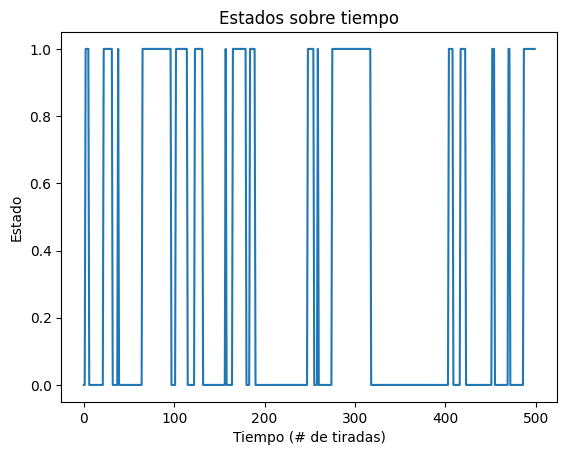

In [11]:
# Dibujamos los estados a lo largo del tiempo
fig, ax = plt.subplots()

ax.plot(gen_estados[:500])

ax.set_title('Estados sobre tiempo')
ax.set_xlabel('Tiempo (# de tiradas)')
ax.set_ylabel('Estado')

plt.show()

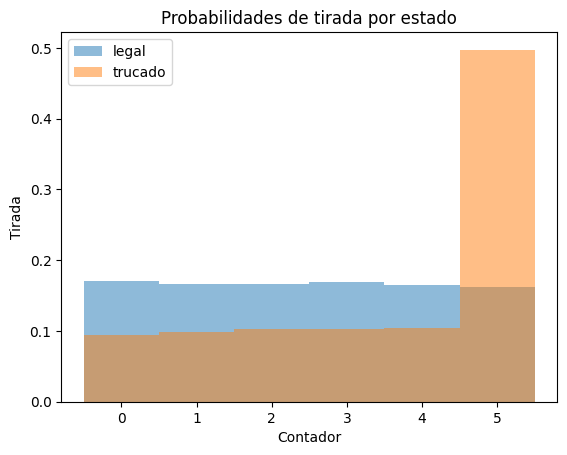

In [12]:
# Dibujamos tiradas del dado ok y del trucado
fig, ax = plt.subplots()

ax.hist(tiradas[gen_estados == 0], label='legal', alpha=0.5, bins=np.arange(7) - 0.5, density=True)

ax.hist(tiradas[gen_estados == 1], label='trucado', alpha=0.5, bins=np.arange(7) - 0.5, density=True)

ax.set_title('Probabilidades de tirada por estado')
ax.set_xlabel('Contador')
ax.set_ylabel('Tirada')
ax.legend()

plt.show()

Ahora, vamos a volver a recalcular los estados ocultos, la matriz de transición y la matriz de emisión entrenando un nuevo modelo con las observaciones generadas con nuestro sintético que intentaba reproducir el escenario del casino. Copia el código y personaliza las semillas aleatorias (línea 9)

In [13]:
# Dividimos datos en train y test (50/50)
X_train = tiradas[:tiradas.shape[0] // 2]
X_test = tiradas[tiradas.shape[0] // 2:]

# Buscar un modelo con score óptimo
gen_score = gen_modelo.score(X_test)
mejor_score = None
mejor_modelo = None

n_entrenamientos = 50
np.random.seed(449) # Personaliza la semilla aleatoria

for idx in range(n_entrenamientos):
    modelo1 = hmm.CategoricalHMM(n_components=2, random_state=idx, init_params='se')
    # No se inicializa la matriz de transiciones, deben dejarse aleatorias
    # porque el valor por defecto es una transición likelihood
    # sabemos que son raras (de otra forma el casino queda descubierto!)
    # así que usamos una distribución aleatoria Dirichlet a-priori con un alfa de
    # (0.1, 0.9) para forzar nuestra suposición de que las transiciones ocurren un 10 %
    modelo1.transmat_ = np.array([np.random.dirichlet([0.9, 0.1]),
                                np.random.dirichlet([0.1, 0.9])])
    modelo1.fit(X_train)
    score = modelo1.score(X_test)
    print(f'Modelo #{idx}\tScore: {score}')
    if mejor_score is None or score > mejor_score:
        mejor_modelo = modelo1
        mejor_score = score

print(f'Score generado: {gen_score}\tMejor score: {mejor_score}')

Modelo #0	Score: -26324.46292571817
Modelo #1	Score: -26360.74711348788
Modelo #2	Score: -26343.8256392671
Modelo #3	Score: -26193.415146602205
Modelo #4	Score: -26341.303862230197
Modelo #5	Score: -26155.688687304886
Modelo #6	Score: -26338.400590895144
Modelo #7	Score: -26269.18803569557
Modelo #8	Score: -26256.88251802351
Modelo #9	Score: -26233.633018755823
Modelo #10	Score: -26194.645503607782
Modelo #11	Score: -26281.567017599176
Modelo #12	Score: -26173.746978551757
Modelo #13	Score: -26341.953583330804
Modelo #14	Score: -26290.248471448336
Modelo #15	Score: -26186.349378392195
Modelo #16	Score: -26259.49578561175
Modelo #17	Score: -26142.414013722948
Modelo #18	Score: -26319.44998259123
Modelo #19	Score: -26310.95707289674
Modelo #20	Score: -26216.136944294518
Modelo #21	Score: -26341.954708585155
Modelo #22	Score: -26149.85559544043
Modelo #23	Score: -26164.334964387403
Modelo #24	Score: -26342.659609395345
Modelo #25	Score: -26341.96242961451
Modelo #26	Score: -26244.49633558

Una vez tenemos el modelo entrenado, generamos los mejores estados ocultos posibles con el algoritmo de codificación, en este caso **Viterbi**

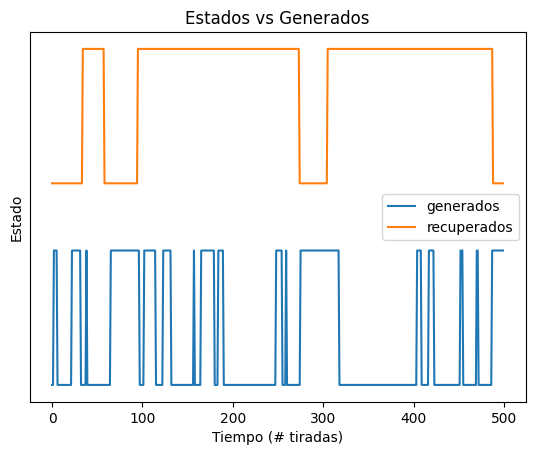

In [14]:
# Usar Viterbi para predecir secuencia de estados más probable
estados = mejor_modelo.predict(tiradas)

# Dibujar los estados recuperados comparados con los generados (primer objetivo)
fig, ax = plt.subplots()

ax.plot(gen_estados[:500], label='generados')
ax.plot(estados[:500] + 1.5, label='recuperados')

ax.set_yticks([])  # Quitar las marcas del eje y
ax.set_title('Estados vs Generados')
ax.set_xlabel('Tiempo (# tiradas)')
ax.set_ylabel('Estado')  # Corregido: el ylabel debe ser 'Estado'
ax.legend()

plt.show()

Y tras dibujar el gráfico que nos muestra cuando se está utilizando el dado trucado
(probabilísticamente) intentamos responder las otras cuestiones:

2) Con qué frecuencia se utiliza el dado trucado (es decir, probabilidades de transición)

In [15]:
# Comprobamos transiciones aprendidas y miramos si concuerdan
print(f'Matriz de Transición Generada:\n{gen_modelo.transmat_.round(3)}\n\n'
      f'Matriz de Transición Recuperada:\n{mejor_modelo.transmat_.round(3)}\n\n')

Matriz de Transición Generada:
[[0.95 0.05]
 [0.1  0.9 ]]

Matriz de Transición Recuperada:
[[0.937 0.063]
 [0.029 0.971]]




3) Probabilidades de cada resultado en una tirada (es decir, probabilidades de emisión)

In [16]:
# Finalmente vemos de qué forma está trucado el dado
print(f'Matriz de Emisiones Generada:\n{gen_modelo.emissionprob_.round(3)}\n\n'
      f'Matriz de Emisiones Recuperada:\n{mejor_modelo.emissionprob_.round(3)}\n\n')

Matriz de Emisiones Generada:
[[0.167 0.167 0.167 0.167 0.167 0.167]
 [0.1   0.1   0.1   0.1   0.1   0.5  ]]

Matriz de Emisiones Recuperada:
[[0.097 0.103 0.108 0.101 0.111 0.48 ]
 [0.163 0.165 0.167 0.159 0.165 0.182]]




### EJERCICIO 19

Predicción del Clima con un Modelo Oculto de Markov (HMM). Vamos a modelar una situación donde el clima (soleado, nublado, lluvioso) es un estado oculto y lo que observamos son actividades diarias (caminar, ir de compras, limpiar de personas). Es decir, nuestro problema es modelizar Estados ocultos (Clima): ☀️ Soleado (0), ☁️ Nublado (1) y 🌧️ Lluvioso (2) cuando observamos Observaciones (Actividades):  Caminar (0), Comprar (1) 🛍️ y Limpiar (2). Las probabilidades iniciales, de transición y emisión quedan recogidas en esta 🏡 figura. Usa python para modelizar este sistema y genera 20 secuencias que debes imprimir:

In [17]:
import numpy as np
from hmmlearn.hmm import CategoricalHMM

# Probabilidades iniciales (estado inicial)
start_probability = np.array([0.3, 0.4, 0.3])  # Soleado, Nublado, Lluvioso

# Matriz de transición entre estados
transition_probability = np.array([
    [0.5, 0.3, 0.2],  # Desde Soleado
    [0.3, 0.4, 0.3],  # Desde Nublado
    [0.2, 0.3, 0.5]   # Desde Lluvioso
])

# Matriz de emisión (estado → observación)
emission_probability = np.array([
    [0.6, 0.3, 0.1],  # Soleado → [Caminar, Comprar, Limpiar]
    [0.3, 0.4, 0.3],  # Nublado
    [0.1, 0.3, 0.6]   # Lluvioso
])

# Crear el modelo
model = CategoricalHMM(n_components=3, random_state=42, n_iter=100)
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

# Generar 20 observaciones
X, Z = model.sample(20)

# Etiquetas amigables
estados = ["☀️ Soleado", "☁️ Nublado", "🌧️ Lluvioso"]
observaciones = ["🚶 Caminar", "🛍️ Comprar", "🧹 Limpiar"]

# Imprimir la secuencia
print("Secuencia de actividades observadas y su estado oculto correspondiente:\n")
for obs, state in zip(X, Z):
    print(f"Actividad: {observaciones[obs[0]]}  ← Estado oculto: {estados[state]}")

Secuencia de actividades observadas y su estado oculto correspondiente:

Actividad: 🧹 Limpiar  ← Estado oculto: ☁️ Nublado
Actividad: 🧹 Limpiar  ← Estado oculto: 🌧️ Lluvioso
Actividad: 🚶 Caminar  ← Estado oculto: ☀️ Soleado
Actividad: 🛍️ Comprar  ← Estado oculto: ☀️ Soleado
Actividad: 🧹 Limpiar  ← Estado oculto: ☁️ Nublado
Actividad: 🧹 Limpiar  ← Estado oculto: ☀️ Soleado
Actividad: 🛍️ Comprar  ← Estado oculto: 🌧️ Lluvioso
Actividad: 🚶 Caminar  ← Estado oculto: ☀️ Soleado
Actividad: 🚶 Caminar  ← Estado oculto: ☀️ Soleado
Actividad: 🚶 Caminar  ← Estado oculto: ☀️ Soleado
Actividad: 🚶 Caminar  ← Estado oculto: ☁️ Nublado
Actividad: 🚶 Caminar  ← Estado oculto: ☀️ Soleado
Actividad: 🛍️ Comprar  ← Estado oculto: ☀️ Soleado
Actividad: 🚶 Caminar  ← Estado oculto: ☀️ Soleado
Actividad: 🚶 Caminar  ← Estado oculto: ☁️ Nublado
Actividad: 🚶 Caminar  ← Estado oculto: ☁️ Nublado
Actividad: 🧹 Limpiar  ← Estado oculto: ☀️ Soleado
Actividad: 🧹 Limpiar  ← Estado oculto: 🌧️ Lluvioso
Actividad: 🚶 Caminar 